In [76]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
data = pd.read_excel('superstore_sales.xlsx')

In [78]:
data = data.dropna(how='all')
data['Month'] = pd.to_datetime(data['order_date']).dt.month

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

## 1. What is the overall sales trend?

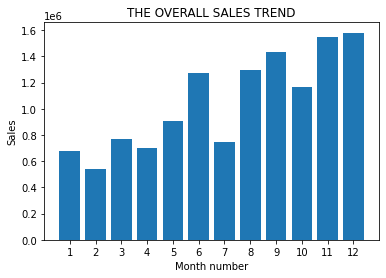

In [92]:
months = range(1,13)

plt.bar(months,data.groupby(['Month']).sum()['sales'])

plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month number')
plt.title('the overall sales trend'.upper())
plt.show()
#plt.savefig('Sales chart.png', dpi=300)

## 2. Which are the Top 10 products by sales?

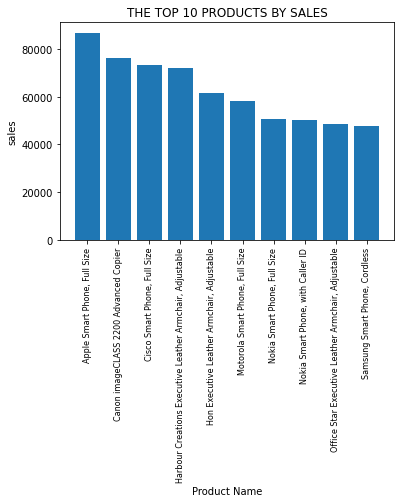

In [93]:
x2 = data.groupby(['product_name'], sort = True).sum()['sales'].nlargest(10)
y2 = [i for i ,df in x2.groupby(['product_name'])]

#plt.plot(x,y)
plt.bar(y2,x2)

plt.xticks(y2, rotation='vertical', size=8)
plt.ylabel('sales')
plt.xlabel('Product Name')
plt.title('the Top 10 products by sales'.upper())
plt.show()
#plt.savefig('Sales chart.png', dpi=300)

## 3. Which are the Most Selling Products?

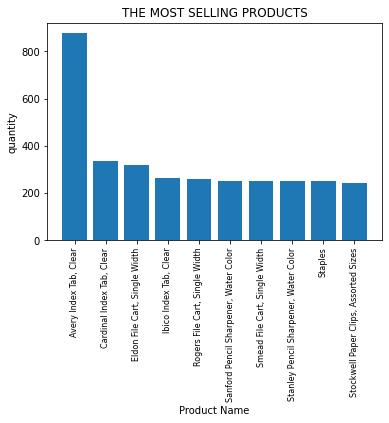

In [94]:
x3 = data.groupby(['product_name'], sort = True).sum()['quantity'].nlargest(10)
y3 = [i for i ,df in x3.groupby(['product_name'])]

plt.bar(y3,x3)

plt.xticks(y3, rotation='vertical', size=8)
plt.ylabel('quantity')
plt.xlabel('Product Name')
plt.title('the Most Selling Products'.upper())
plt.show()
#plt.savefig('Sales chart.png', dpi=300)

## 4. Which is the most preferred Ship Mode?

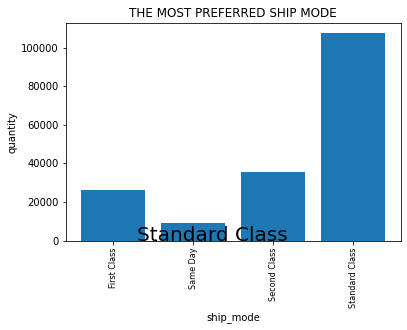

In [113]:
x4 = data.groupby(['ship_mode'], sort = True).sum()['quantity']
y4 = [i for i ,df in x4.groupby(['ship_mode'])]

#plt.plot(x,y)
plt.bar(y4,x4)

plt.xticks(y4, rotation='vertical', size=8)
plt.ylabel('quantity')
plt.xlabel('ship_mode')
plt.title('the most preferred Ship Mode'.upper())
plt.text(0.3, 0.3, max(y4), size=20)
plt.show()
#plt.savefig('Sales chart.png', dpi=300)

## 5. Which are the Most Profitable Category and Sub-Category?

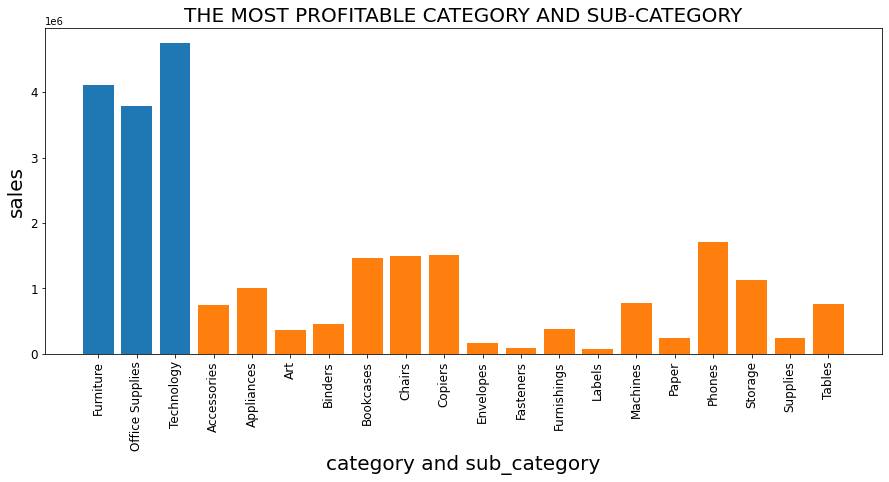

In [154]:
cat = data.groupby(['category'], sort = True).sum()['sales']
subcat = data.groupby(['sub_category'], sort = True).sum()['sales']

y5 = [i for i ,df in cat.groupby(['category'])]
ys5 = [i for i ,df in subcat.groupby(['sub_category'])]

plt.figure(figsize=(15,6))
#plt.plot(x,y)
plt.bar(y5,cat)
plt.bar(ys5,subcat)

plt.xticks(y5+ys5, rotation='vertical', size=12)
plt.yticks(size=12)
#plt.xticks(ys5, rotation='vertical', size=8)
plt.ylabel('sales', size = 20)
plt.xlabel('category and sub_category', size = 20)
plt.title('the Most Profitable Category and Sub-Category'.upper(),size = 20)

plt.show()